In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn nltk

In [5]:
import os
import pandas as pd

data = []

base_dir = r"C:\Users\malva\Downloads\aclImdb_v1\aclImdb"

for dataset_type in ['train', 'test']:
    
    for sentiment in ['pos', 'neg']:
        
        folder = os.path.join(base_dir, dataset_type, sentiment)
        
        for file in os.listdir(folder):
            
            file_path = os.path.join(folder, file)
            
            with open(file_path, encoding='utf-8') as f:
                
                review = f.read()
                
                data.append([review, sentiment])

df = pd.DataFrame(data, columns=['review', 'sentiment'])

print("Dataset loaded:", len(df))
df.head()

Dataset loaded: 50000


,review,sentiment
0,Bromwell High is a cartoon comedy. It ran at t...,pos
1,Homelessness (or Houselessness as George Carli...,pos
2,Brilliant over-acting by Lesley Ann Warren. Be...,pos
3,This is easily the most underrated film inn th...,pos
4,This is not the typical Mel Brooks film. It wa...,pos


In [6]:
df.to_csv("dataset/imdb.csv", index=False)

print("Dataset saved successfully")

Dataset saved successfully


In [7]:
df['label'] = df['sentiment'].map({
    'pos': 1,
    'neg': 0
})

df.head()

,review,sentiment,label
0,Bromwell High is a cartoon comedy. It ran at t...,pos,1
1,Homelessness (or Houselessness as George Carli...,pos,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,pos,1
3,This is easily the most underrated film inn th...,pos,1
4,This is not the typical Mel Brooks film. It wa...,pos,1


In [8]:
import nltk
import string

nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):

    text = text.lower()

    text = ''.join([char for char in text if char not in string.punctuation])

    words = text.split()

    words = [word for word in words if word not in stop_words]

    return ' '.join(words)

df['cleaned_review'] = df['review'].apply(clean_text)

df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\malva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,sentiment,label,cleaned_review
0,Bromwell High is a cartoon comedy. It ran at t...,pos,1,bromwell high cartoon comedy ran time programs...
1,Homelessness (or Houselessness as George Carli...,pos,1,homelessness houselessness george carlin state...
2,Brilliant over-acting by Lesley Ann Warren. Be...,pos,1,brilliant overacting lesley ann warren best dr...
3,This is easily the most underrated film inn th...,pos,1,easily underrated film inn brooks cannon sure ...
4,This is not the typical Mel Brooks film. It wa...,pos,1,typical mel brooks film much less slapstick mo...


In [9]:
from sklearn.model_selection import train_test_split

X = df['cleaned_review']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

Training samples: 40000
Testing samples: 10000


In [10]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_features=5000)

X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

print("Vectorization complete")

Vectorization complete


In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

nb = MultinomialNB()

nb.fit(X_train_count, y_train)

nb_pred = nb.predict(X_test_count)

print("Naive Bayes Accuracy:",
      accuracy_score(y_test, nb_pred))

Naive Bayes Accuracy: 0.8525


In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)

lr.fit(X_train_count, y_train)

lr_pred = lr.predict(X_test_count)

print("Logistic Regression Accuracy:",
      accuracy_score(y_test, lr_pred))

Logistic Regression Accuracy: 0.8755


In [13]:
from sklearn.svm import LinearSVC

svm = LinearSVC()

svm.fit(X_train_count, y_train)

svm_pred = svm.predict(X_test_count)

print("SVM Accuracy:",
      accuracy_score(y_test, svm_pred))

SVM Accuracy: 0.8696


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF complete")

TF-IDF complete


In [15]:
lr_tfidf = LogisticRegression(max_iter=1000)

lr_tfidf.fit(X_train_tfidf, y_train)

tfidf_pred = lr_tfidf.predict(X_test_tfidf)

print("TF-IDF Logistic Regression Accuracy:",
      accuracy_score(y_test, tfidf_pred))

TF-IDF Logistic Regression Accuracy: 0.8928


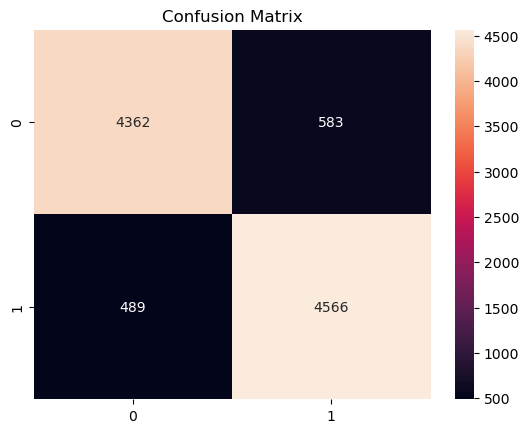

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, tfidf_pred)

sns.heatmap(cm, annot=True, fmt='d')

plt.title("Confusion Matrix")

plt.show()

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, tfidf_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4945
           1       0.89      0.90      0.89      5055

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [18]:
import numpy as np

feature_names = tfidf.get_feature_names_out()

coefficients = lr_tfidf.coef_[0]

top_positive = np.argsort(coefficients)[-10:]

top_negative = np.argsort(coefficients)[:10]

print("Top Positive Words:")
print([feature_names[i] for i in top_positive])

print("\nTop Negative Words:")
print([feature_names[i] for i in top_negative])

Top Positive Words:
['loved', 'hilarious', 'favorite', 'wonderful', 'best', 'amazing', '710', 'perfect', 'excellent', 'great']

Top Negative Words:
['worst', 'waste', 'awful', 'bad', 'boring', 'terrible', 'poor', 'dull', 'worse', 'poorly']
